# Datan keräys

In [355]:
#!pip install requests

In [356]:
#import scrapy

In [357]:
#!scrapy genspider autotori_scraper auto.tori.fi

In [358]:
#!scrapy runspider autotori_scraper.py -o all_autotori_2.json

# Datan putsaus

In [359]:
import pandas as pd
import re
import numpy as np

In [360]:
df = pd.read_json('all_autotori_1.json')

In [361]:
df

,response,price,data,"city, date & time",title,description
0,<HtmlResponse 200 https://autot.tori.fi/vaihto...,13 450 €,157 000 km2016DieselAutomaatti,Vantaa26. helmikuuta 10:54,Ford C-Max,"Compact 1,5 TDCi 120 hv start/stop PowerShift ..."
1,<HtmlResponse 200 https://autot.tori.fi/vaihto...,1 790 €,301 000 km2007DieselManuaali,KuopioTänään 14:16,Ford Mondeo,Ford Mondeo 2.0TDci -07
2,<HtmlResponse 200 https://autot.tori.fi/vaihto...,3 800 €,1970BensiiniManuaali,KuortaneTänään 14:12,Mitsubushi Celeste Coupe 1600 ST / 2.0 1977,
3,<HtmlResponse 200 https://autot.tori.fi/vaihto...,3 750 €,353 000 km2001,VaasaTänään 14:05,Volvo V70,Volvo V70 2.4T AWD B5244 T3
4,<HtmlResponse 200 https://autot.tori.fi/vaihto...,-,233 000 km2001BensiiniManuaali,SavonlinnaTänään 14:05,Citroen Berlingo,"Citroen Berlingo 1.6, 16V. 109 hv. 7 hengelle"
...,...,...,...,...,...,...
9996,<HtmlResponse 200 https://autot.tori.fi/vaihto...,18 400 €,27 000 km2018BensiiniManuaali,Rovaniemi9. huhtikuuta 5:39,Ford Fiesta,"1,0 EcoBoost 100hv Vignale 5ov"
9997,<HtmlResponse 200 https://autot.tori.fi/vaihto...,31 800 €,111 000 km2016DieselAutomaatti,Vantaa9. huhtikuuta 5:39,Mercedes-Benz E 220,220 d A Premium Business - Suomiauto Navi Spor...
9998,<HtmlResponse 200 https://autot.tori.fi/vaihto...,9 500 €,131 000 km2011BensiiniManuaali,Salo9. huhtikuuta 5:39,Peugeot RCZ,THP 156
9999,<HtmlResponse 200 https://autot.tori.fi/vaihto...,16 900 €,20 000 km2018HybridiAutomaatti,Espoo9. huhtikuuta 5:38,Toyota Yaris,"1,5 Hybrid Active 5ov * Suomi-auto / Kamera / ..."


In [362]:
df = df.loc[df['data'] != '',:]
df = df.loc[df['price'] != '-',:]
df = df.loc[df['description'] != '',:]

In [363]:
df['price']= df['price'].apply(lambda x:x.replace(' €','').replace(' ',''))

In [364]:
df

,response,price,data,"city, date & time",title,description
0,<HtmlResponse 200 https://autot.tori.fi/vaihto...,13450,157 000 km2016DieselAutomaatti,Vantaa26. helmikuuta 10:54,Ford C-Max,"Compact 1,5 TDCi 120 hv start/stop PowerShift ..."
1,<HtmlResponse 200 https://autot.tori.fi/vaihto...,1790,301 000 km2007DieselManuaali,KuopioTänään 14:16,Ford Mondeo,Ford Mondeo 2.0TDci -07
2,<HtmlResponse 200 https://autot.tori.fi/vaihto...,3800,1970BensiiniManuaali,KuortaneTänään 14:12,Mitsubushi Celeste Coupe 1600 ST / 2.0 1977,
3,<HtmlResponse 200 https://autot.tori.fi/vaihto...,3750,353 000 km2001,VaasaTänään 14:05,Volvo V70,Volvo V70 2.4T AWD B5244 T3
5,<HtmlResponse 200 https://autot.tori.fi/vaihto...,3410,344 000 km2009DieselAutomaatti,KuopioTänään 14:05,Opel Zafira,"1,9. KATSASTUS VOIMASSA 1.3.2022 SAAKKA MYÖS V..."
...,...,...,...,...,...,...
9996,<HtmlResponse 200 https://autot.tori.fi/vaihto...,18400,27 000 km2018BensiiniManuaali,Rovaniemi9. huhtikuuta 5:39,Ford Fiesta,"1,0 EcoBoost 100hv Vignale 5ov"
9997,<HtmlResponse 200 https://autot.tori.fi/vaihto...,31800,111 000 km2016DieselAutomaatti,Vantaa9. huhtikuuta 5:39,Mercedes-Benz E 220,220 d A Premium Business - Suomiauto Navi Spor...
9998,<HtmlResponse 200 https://autot.tori.fi/vaihto...,9500,131 000 km2011BensiiniManuaali,Salo9. huhtikuuta 5:39,Peugeot RCZ,THP 156
9999,<HtmlResponse 200 https://autot.tori.fi/vaihto...,16900,20 000 km2018HybridiAutomaatti,Espoo9. huhtikuuta 5:38,Toyota Yaris,"1,5 Hybrid Active 5ov * Suomi-auto / Kamera / ..."


In [365]:
brandWS = ['Alfa Romeo', 'Aston Martin', 'Land Rover']

def addKilometers(x):
    if 'km' in x:
        kilometerRe = re.match('^(\d+|\s)+',x)
        return kilometerRe.group(0).replace(" ", "")
    else:
        return '-1'
    
def addYear(x):
    result = re.search('(\d{4})',x)
    if result:
        yearRe = re.search('(\d{4})',x)
        return yearRe.group(0)
    else:
        return '0' 

def addFuel(x):
    if x.find('Bensiini') != -1:
        return 'Bensiini'
    elif x.find('Diesel') != -1:
        return 'Diesel'
    elif x.find('Hybridi') != -1:
        return 'Hybridi'
    elif x.find('Kaasu') != -1:
        return 'Kaasu'
    elif x.find('Sähkö') != -1:
        return 'Sähkö'
    elif x.find('E85 / Flexifuel') != -1:
        return 'E85 / Flexifuel'
    else:
        return '-'

def addGear(x):
    if x.find('Manuaali') != -1:
        return 'Manuaali'
    elif x.find('Automaatti') != -1:
        return 'Automaatti'
    else:
        return '-'

def addBrand(x):
    brandName = x.split()
    for brand in brandWS:
        if brand.find(brandName[0]) != -1:
            return brandName[0] + ' ' + brandName[1]
    return brandName[0]

def addModel(x):
    brandName = x.split()
    length = len(brandName)
    model = ''
    i = 0
    for brand in brandWS:
        if brand.find(brandName[0]) != -1:
            for i in range (2, length):
                if brandName[i] == '/':
                    break
                if model == '':
                    model = brandName[i]
                else:
                    model = model + ' ' + brandName[i]
            return model
    for i in range (1, length):
        if brandName[i] == '/':
            break
        if model == '':
            model = brandName[i]
        else:
            model = model + ' ' + brandName[i]
    return model

def addCity(x):
    if re.match('^([A-ZÄÖÅ][a-zäöå]+)',x):
        print(x)
        return re.match('^([A-ZÄÖÅ][a-zäöå]+)',x).group(0)
    else:
        return ''

In [366]:
df['kilometer']=df['data'].apply(addKilometers)
df['year']=df['data'].apply(addYear)
df['fuel']=df['data'].apply(addFuel)
df['gear']=df['data'].apply(addGear)
df['brand']= df['title'].apply(addBrand)
df['model']=df['title'].apply(addModel)
df['city']=df['city, date & time'].apply(addCity)

Vantaa26. helmikuuta 10:54
KuopioTänään 14:16
KuortaneTänään 14:12
VaasaTänään 14:05
KuopioTänään 14:05
KouvolaTänään 14:02
JyväskyläTänään 14:02
PirkkalaTänään 14:02
KarkkilaTänään 14:01
SomeroTänään 14:00
KemiTänään 13:59
JyväskyläTänään 13:58
OuluTänään 13:58
KangasalaTänään 13:56
JoensuuTänään 13:56
JyväskyläTänään 13:53
JyväskyläTänään 13:53
SastamalaTänään 13:53
KemiönsaariTänään 13:53
KarstulaTänään 13:52
NaantaliTänään 13:52
KajaaniTänään 13:52
TurkuTänään 13:50
JyväskyläTänään 13:49
MuurameTänään 13:49
HelsinkiTänään 13:48
ÄänekoskiTänään 13:48
KempeleTänään 13:45
RaisioTänään 13:42
TampereTänään 13:41
VarkausTänään 13:40
LohjaTänään 13:39
HaapavesiTänään 13:38
JoensuuTänään 13:37
JyväskyläTänään 13:35
SomeroTänään 13:34
KuopioTänään 13:34
TampereTänään 13:24
TurkuTänään 13:22
NakkilaTänään 13:19
EspooTänään 13:17
NurmesTänään 13:16
JyväskyläTänään 13:15
EspooTänään 13:15
LappeenrantaTänään 13:13
HelsinkiTänään 13:10
LohjaTänään 13:09
ForssaTänään 13:05
HämeenlinnaTänään 13:03

Kauhajoki16. huhtikuuta 11:20
Järvenpää16. huhtikuuta 11:19
Lahti16. huhtikuuta 11:18
Raisio16. huhtikuuta 11:17
Pori16. huhtikuuta 11:16
Espoo16. huhtikuuta 11:14
Tampere16. huhtikuuta 11:14
Lempäälä16. huhtikuuta 11:13
Vaasa16. huhtikuuta 11:13
Oulu16. huhtikuuta 11:13
Turku16. huhtikuuta 11:12
Oulu16. huhtikuuta 11:12
Raisio16. huhtikuuta 11:11
Hämeenlinna16. huhtikuuta 11:11
Helsinki16. huhtikuuta 11:11
Pello16. huhtikuuta 11:10
Raisio16. huhtikuuta 11:10
Vantaa16. huhtikuuta 11:09
Turku16. huhtikuuta 11:09
Laihia16. huhtikuuta 11:09
Kouvola16. huhtikuuta 11:08
Vantaa16. huhtikuuta 11:08
Tampere16. huhtikuuta 11:08
Pieksämäki16. huhtikuuta 11:07
Oulu16. huhtikuuta 11:06
Seinäjoki16. huhtikuuta 11:06
Vaasa16. huhtikuuta 11:06
Espoo16. huhtikuuta 11:06
Joensuu16. huhtikuuta 11:05
Huittinen16. huhtikuuta 11:02
Lapua16. huhtikuuta 11:02
Rovaniemi16. huhtikuuta 11:01
Tampere16. huhtikuuta 11:01
Lappeenranta16. huhtikuuta 11:01
Lahti16. huhtikuuta 11:00
Vantaa16. huhtikuuta 11:00
Helsink

Lahti14. huhtikuuta 16:36
Parkano14. huhtikuuta 16:36
Ylöjärvi14. huhtikuuta 16:36
Oulu14. huhtikuuta 16:34
Turku14. huhtikuuta 16:29
Liperi14. huhtikuuta 16:28
Turku14. huhtikuuta 16:28
Lahti14. huhtikuuta 16:23
Turku14. huhtikuuta 16:20
Tampere14. huhtikuuta 16:18
Hämeenlinna14. huhtikuuta 16:12
Lempäälä14. huhtikuuta 16:11
Helsinki14. huhtikuuta 16:07
Pyhäranta14. huhtikuuta 16:05
Helsinki14. huhtikuuta 16:04
Järvenpää14. huhtikuuta 16:03
Kokemäki14. huhtikuuta 16:02
Pori14. huhtikuuta 16:01
Hämeenlinna14. huhtikuuta 15:57
Espoo14. huhtikuuta 15:56
Joensuu14. huhtikuuta 15:56
Jyväskylä14. huhtikuuta 15:56
Oulu14. huhtikuuta 15:55
Savitaipale14. huhtikuuta 15:52
Pyhäntä14. huhtikuuta 15:50
Muhos14. huhtikuuta 15:50
Lempäälä14. huhtikuuta 15:46
Oulu14. huhtikuuta 15:43
Tuusula14. huhtikuuta 15:41
Vantaa14. huhtikuuta 15:40
Ylöjärvi14. huhtikuuta 15:36
Pirkkala14. huhtikuuta 15:32
Kitee14. huhtikuuta 15:32
Lapinlahti14. huhtikuuta 15:31
Kuopio14. huhtikuuta 15:28
Helsinki14. huhtikuuta

Rovaniemi13. huhtikuuta 4:28
Pori13. huhtikuuta 4:28
Lohja13. huhtikuuta 4:27
Espoo13. huhtikuuta 4:26
Oulu13. huhtikuuta 4:25
Sastamala13. huhtikuuta 4:24
Vaasa13. huhtikuuta 4:23
Tuusula13. huhtikuuta 4:23
Raisio13. huhtikuuta 4:21
Saarijärvi13. huhtikuuta 4:20
Joensuu13. huhtikuuta 4:20
Helsinki13. huhtikuuta 4:20
Kokkola13. huhtikuuta 4:18
Tampere13. huhtikuuta 4:17
Vantaa13. huhtikuuta 4:16
Vantaa13. huhtikuuta 4:14
Lempäälä13. huhtikuuta 4:10
Helsinki13. huhtikuuta 4:07
Pori13. huhtikuuta 4:06
Tampere13. huhtikuuta 4:06
Seinäjoki13. huhtikuuta 4:05
Oulu13. huhtikuuta 4:05
Heinävesi13. huhtikuuta 4:04
Tuusula13. huhtikuuta 4:03
Helsinki13. huhtikuuta 4:02
Kangasala13. huhtikuuta 4:02
Pirkkala13. huhtikuuta 4:01
Joensuu13. huhtikuuta 4:00
Joensuu13. huhtikuuta 4:00
Joensuu13. huhtikuuta 3:57
Oulu13. huhtikuuta 3:55
Varkaus13. huhtikuuta 3:52
Seinäjoki12. huhtikuuta 22:07
Tornio12. huhtikuuta 21:53
Kaarina12. huhtikuuta 21:09
Helsinki12. huhtikuuta 20:54
Ilmajoki12. huhtikuuta 20:29

Pielavesi9. huhtikuuta 16:09
Tampere9. huhtikuuta 16:09
Lempäälä9. huhtikuuta 16:08
Raisio9. huhtikuuta 16:08
Lempäälä9. huhtikuuta 16:06
Tampere9. huhtikuuta 16:05
Espoo9. huhtikuuta 16:04
Oulu9. huhtikuuta 16:02
Kouvola9. huhtikuuta 16:00
Jyväskylä9. huhtikuuta 15:58
Vaasa9. huhtikuuta 15:58
Vantaa9. huhtikuuta 15:57
Lempäälä9. huhtikuuta 15:57
Vantaa9. huhtikuuta 15:57
Rauma9. huhtikuuta 15:57
Helsinki9. huhtikuuta 15:56
Espoo9. huhtikuuta 15:56
Espoo9. huhtikuuta 15:55
Vantaa9. huhtikuuta 15:55
Forssa9. huhtikuuta 15:53
Siilinjärvi9. huhtikuuta 15:53
Laihia9. huhtikuuta 15:52
Kuopio9. huhtikuuta 15:50
Rovaniemi9. huhtikuuta 15:50
Oulu9. huhtikuuta 15:48
Lappeenranta9. huhtikuuta 15:47
Helsinki9. huhtikuuta 15:46
Imatra9. huhtikuuta 15:44
Hyvinkää9. huhtikuuta 15:43
Ylöjärvi9. huhtikuuta 15:42
Ikaalinen9. huhtikuuta 15:40
Hämeenlinna9. huhtikuuta 15:39
Espoo9. huhtikuuta 15:38
Espoo9. huhtikuuta 15:38
Tampere9. huhtikuuta 15:36
Jyväskylä9. huhtikuuta 15:35
Kouvola9. huhtikuuta 15:34

In [368]:
df = df.loc[df['kilometer'] != '-1',:]
df = df.loc[df['kilometer'] != '',:]

In [371]:
cdf = pd.DataFrame(df['brand'])
cdf = cdf.join(df['model'])
cdf = cdf.join(df['price'].astype('int'))
cdf = cdf.join(df['year'].astype('int'))
cdf = cdf.join(df['kilometer'].astype('int'))
cdf = cdf.join(df['fuel'])
cdf = cdf.join(df['gear'])
cdf = cdf.join(df['city'])

In [372]:
cdf.dtypes


brand        object
model        object
price         int64
year          int64
kilometer     int64
fuel         object
gear         object
city         object
dtype: object

In [373]:
cdf

,brand,model,price,year,kilometer,fuel,gear,city
0,Ford,C-Max,13450,2016,157000,Diesel,Automaatti,Vantaa
1,Ford,Mondeo,1790,2007,301000,Diesel,Manuaali,Kuopio
3,Volvo,V70,3750,2001,353000,-,-,Vaasa
5,Opel,Zafira,3410,2009,344000,Diesel,Automaatti,Kuopio
6,Peugeot,206,1990,2003,141680,Bensiini,-,Kouvola
...,...,...,...,...,...,...,...,...
9996,Ford,Fiesta,18400,2018,27000,Bensiini,Manuaali,Rovaniemi
9997,Mercedes-Benz,E 220,31800,2016,111000,Diesel,Automaatti,Vantaa
9998,Peugeot,RCZ,9500,2011,131000,Bensiini,Manuaali,Salo
9999,Toyota,Yaris,16900,2018,20000,Hybridi,Automaatti,Espoo


# Datan kuvailu

In [374]:
cdf

,brand,model,price,year,kilometer,fuel,gear,city
0,Ford,C-Max,13450,2016,157000,Diesel,Automaatti,Vantaa
1,Ford,Mondeo,1790,2007,301000,Diesel,Manuaali,Kuopio
3,Volvo,V70,3750,2001,353000,-,-,Vaasa
5,Opel,Zafira,3410,2009,344000,Diesel,Automaatti,Kuopio
6,Peugeot,206,1990,2003,141680,Bensiini,-,Kouvola
...,...,...,...,...,...,...,...,...
9996,Ford,Fiesta,18400,2018,27000,Bensiini,Manuaali,Rovaniemi
9997,Mercedes-Benz,E 220,31800,2016,111000,Diesel,Automaatti,Vantaa
9998,Peugeot,RCZ,9500,2011,131000,Bensiini,Manuaali,Salo
9999,Toyota,Yaris,16900,2018,20000,Hybridi,Automaatti,Espoo


In [375]:
cdf

,brand,model,price,year,kilometer,fuel,gear,city
0,Ford,C-Max,13450,2016,157000,Diesel,Automaatti,Vantaa
1,Ford,Mondeo,1790,2007,301000,Diesel,Manuaali,Kuopio
3,Volvo,V70,3750,2001,353000,-,-,Vaasa
5,Opel,Zafira,3410,2009,344000,Diesel,Automaatti,Kuopio
6,Peugeot,206,1990,2003,141680,Bensiini,-,Kouvola
...,...,...,...,...,...,...,...,...
9996,Ford,Fiesta,18400,2018,27000,Bensiini,Manuaali,Rovaniemi
9997,Mercedes-Benz,E 220,31800,2016,111000,Diesel,Automaatti,Vantaa
9998,Peugeot,RCZ,9500,2011,131000,Bensiini,Manuaali,Salo
9999,Toyota,Yaris,16900,2018,20000,Hybridi,Automaatti,Espoo


In [377]:
dropBrands = cdf['brand'].map(cdf['brand'].value_counts()) >= 9
cdf = cdf.loc[dropBrands,:]
k = cdf['model'].map(cdf['model'].value_counts()) > 2
cdf = cdf.loc[k,:]

In [378]:
def addLatLong(x):
    address=x
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    print(address)
    print([location.latitude, location.longitude])
    return [location.latitude, location.longitude]

In [379]:
#cityDF['city'] = pd.DataFrame(cdf['city'].drop_duplicates().to_numpy())
# cityDF.drop(0, axis = 'columns', inplace =True)
#cityDF['Lat & Long'] = cityDF['city'].apply(addLatLong)
cityDF

,city,Lat & Long
0,Vantaa,"[60.3091871, 25.0364526]"
1,Kuopio,"[62.8241424, 27.594561484488977]"
2,Vaasa,"[63.0957722, 21.6159187]"
3,Kouvola,"[60.8701996, 26.7018042]"
4,Jyväskylä,"[62.2393002, 25.745951]"
...,...,...
233,Vöyri,"[63.1304959, 22.250699]"
234,Noormarkku,"[61.5927219, 21.8684545]"
235,Tervola,"[66.0822914, 24.8058841]"
236,Pyhäjoki,"[64.4663193, 24.2550528]"


In [380]:
# cityDF['city'] == 'Vantaa'
# cdf['latitude & longitude'] = cd
# cdf['latitude & longitude'] = cdf['city'].map(cityDF.set_index('city')['Lat & Long'])

In [381]:
# cdf = cdf.reset_index(drop=True)

In [383]:
#cdf['lat'] = testi2['latitude & longitude'].apply(lambda x: x[0])
#cdf['lon'] = testi2['latitude & longitude'].apply(lambda x: x[1])

In [384]:
#cdf = cdf.drop(['latitude & longitude'], axis = 1)

In [385]:
#cdf

In [386]:
#co = pd.DataFrame(cdf['lat'])
#co['lon'] = cdf['lon']
#co

In [387]:
#!pip install pydeck

In [388]:
#!pip install plotly

In [389]:
# cdf.to_json('clearedCarDataWLL2.json')


In [390]:
# testi.index.values

In [391]:
# cdf['count'] = cdf['brand'].map(testi.set_index(testi.index.values)['brand']) 

In [392]:
# cdf = cdf.loc[cdf['count'] >= 9,:]

In [393]:
cdf

,brand,model,price,year,kilometer,fuel,gear,city
0,Ford,C-Max,13450,2016,157000,Diesel,Automaatti,Vantaa
1,Ford,Mondeo,1790,2007,301000,Diesel,Manuaali,Kuopio
3,Volvo,V70,3750,2001,353000,-,-,Vaasa
5,Opel,Zafira,3410,2009,344000,Diesel,Automaatti,Kuopio
6,Peugeot,206,1990,2003,141680,Bensiini,-,Kouvola
...,...,...,...,...,...,...,...,...
9995,Mercedes-Benz,GLC 220,43900,2018,69000,Diesel,Automaatti,Vantaa
9996,Ford,Fiesta,18400,2018,27000,Bensiini,Manuaali,Rovaniemi
9997,Mercedes-Benz,E 220,31800,2016,111000,Diesel,Automaatti,Vantaa
9999,Toyota,Yaris,16900,2018,20000,Hybridi,Automaatti,Espoo


In [394]:
# cdf.to_json(r'clearedCarData3.json')

In [395]:
import matplotlib.pyplot

In [396]:
cdf['brand']

0                 Ford
1                 Ford
3                Volvo
5                 Opel
6              Peugeot
             ...      
9995     Mercedes-Benz
9996              Ford
9997     Mercedes-Benz
9999            Toyota
10000            Honda
Name: brand, Length: 8778, dtype: object

# Alla tallennettavaa tiedostoa käytetään streamlitissä

In [397]:
ddf = pd.read_json('clearedCarDataWLL2.json')

# Omaa kehitystyötä

In [398]:
ddf

,brand,model,price,year,kilometer,fuel,gear,city,lat,lon
0,Ford,C-Max,13450,2016,157000,Diesel,Automaatti,Vantaa,60.309187,25.036453
1,Ford,Mondeo,1790,2007,301000,Diesel,Manuaali,Kuopio,62.824142,27.594561
2,Volvo,V70,3750,2001,353000,-,-,Vaasa,63.095772,21.615919
3,Opel,Zafira,3410,2009,344000,Diesel,Automaatti,Kuopio,62.824142,27.594561
4,Peugeot,206,1990,2003,141680,Bensiini,-,Kouvola,60.870200,26.701804
...,...,...,...,...,...,...,...,...,...,...
8773,Mercedes-Benz,GLC 220,43900,2018,69000,Diesel,Automaatti,Vantaa,60.309187,25.036453
8774,Ford,Fiesta,18400,2018,27000,Bensiini,Manuaali,Rovaniemi,66.497621,25.719210
8775,Mercedes-Benz,E 220,31800,2016,111000,Diesel,Automaatti,Vantaa,60.309187,25.036453
8776,Toyota,Yaris,16900,2018,20000,Hybridi,Automaatti,Espoo,60.224187,24.660363


In [399]:
ddf = ddf.loc[ddf['year'] != 0,:]
ddf = ddf.loc[ddf['kilometer'] < 1000000,:]
ddf = ddf.loc[ddf['year'] > 1996,:]
# testi = pd.DataFrame(ddf['model'].value_counts()).reset_index()
k = ddf['model'].map(ddf['model'].value_counts()) > 2
# ddf.columns.drop(columns = list(k.to_numpy().astype(int)))

In [400]:
ddf = ddf.loc[k,:]

In [401]:
ddf

,brand,model,price,year,kilometer,fuel,gear,city,lat,lon
0,Ford,C-Max,13450,2016,157000,Diesel,Automaatti,Vantaa,60.309187,25.036453
1,Ford,Mondeo,1790,2007,301000,Diesel,Manuaali,Kuopio,62.824142,27.594561
2,Volvo,V70,3750,2001,353000,-,-,Vaasa,63.095772,21.615919
3,Opel,Zafira,3410,2009,344000,Diesel,Automaatti,Kuopio,62.824142,27.594561
4,Peugeot,206,1990,2003,141680,Bensiini,-,Kouvola,60.870200,26.701804
...,...,...,...,...,...,...,...,...,...,...
8773,Mercedes-Benz,GLC 220,43900,2018,69000,Diesel,Automaatti,Vantaa,60.309187,25.036453
8774,Ford,Fiesta,18400,2018,27000,Bensiini,Manuaali,Rovaniemi,66.497621,25.719210
8775,Mercedes-Benz,E 220,31800,2016,111000,Diesel,Automaatti,Vantaa,60.309187,25.036453
8776,Toyota,Yaris,16900,2018,20000,Hybridi,Automaatti,Espoo,60.224187,24.660363


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='year', ylabel='price'>,
        <AxesSubplot:xlabel='kilometer', ylabel='price'>,
        <AxesSubplot:xlabel='lat', ylabel='price'>,
        <AxesSubplot:xlabel='lon', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='kilometer', ylabel='year'>,
        <AxesSubplot:xlabel='lat', ylabel='year'>,
        <AxesSubplot:xlabel='lon', ylabel='year'>],
       [<AxesSubplot:xlabel='price', ylabel='kilometer'>,
        <AxesSubplot:xlabel='year', ylabel='kilometer'>,
        <AxesSubplot:xlabel='kilometer', ylabel='kilometer'>,
        <AxesSubplot:xlabel='lat', ylabel='kilometer'>,
        <AxesSubplot:xlabel='lon', ylabel='kilometer'>],
       [<AxesSubplot:xlabel='price', ylabel='lat'>,
        <AxesSubplot:xlabel='year', ylabel='lat'>,
        <AxesSubplot:xlabel='kilometer', ylabel='lat'>,
        <AxesSub

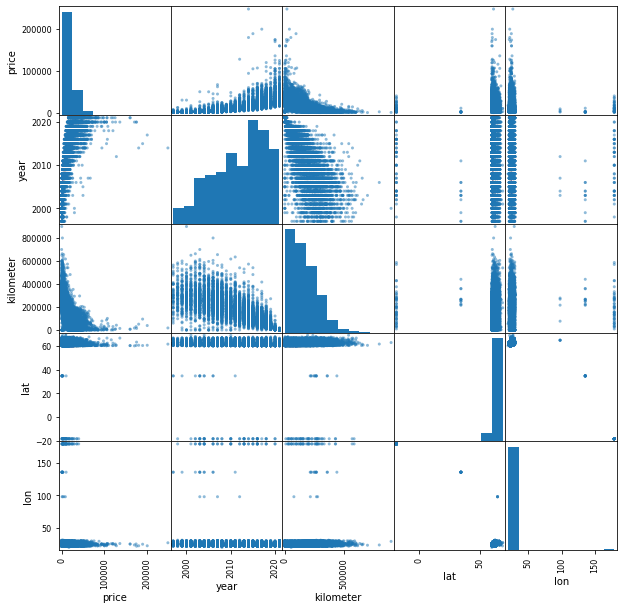

In [402]:
pd.plotting.scatter_matrix(ddf, alpha = 0.5, figsize = (10,10))

In [403]:
!pip install scikit-learn 

In [404]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [405]:
x = ddf[['kilometer','year']]
y = ddf['price']

In [406]:
clf = LinearRegression().fit(x,y)

In [407]:
clf.score(x,y)

0.47141969237818526

In [408]:
features = ['year','kilometer']
X = ddf[features]
y = ddf['price']
len(pd.get_dummies(ddf['brand']))

8511

In [409]:
X = pd.concat([X,pd.get_dummies(ddf[['brand','model']])],axis = 1)

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = LinearRegression().fit(X_train,y_train)
clf.score(X_test,y_test)

-1348630659.203033

In [411]:
clf.predict(X_test.iloc[-1,:].values.reshape(1,len(X_test.columns)))

array([18541.03594112])

In [412]:
y_test.iloc[-1]

13800

In [413]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC 

In [414]:
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

In [415]:
# X_train.columns

In [416]:
# clf.score(X_train, y_train)

In [417]:
# !pip install geopy
# !pip install Nominatim

In [418]:
from geopy.geocoders import Nominatim
address='Pirkkala'
geolocator = Nominatim(user_agent="Your_Name")
location = geolocator.geocode(address)
print(location.address)
print((location.latitude, location.longitude))
print([location.latitude, location.longitude])

Pirkkala, Tampereen seutukunta, Pirkanmaa, Länsi- ja Sisä-Suomen aluehallintovirasto, Manner-Suomi, Suomi / Finland
(61.4654497, 23.6456252)
[61.4654497, 23.6456252]


In [419]:
def addLat(x):
    address=x
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    return [location.latitude]

In [420]:
# ddf['city'].apply(addLatLong)